In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# Melbourne Housing Dataset with a lot of missing values , here i have taken only some few numeric columns for our convenience.
df = pd.read_csv('Melbourne_housing.csv',usecols=['Latitude', 'Longtitude',
        'Propertycount', 'Price'])

In [3]:
df

,Latitude,Longtitude,Propertycount,Price
0,-37.80140,144.99580,4019.0,NaN
1,-37.71800,144.87800,3464.0,840000.0
2,-37.84590,144.95550,3280.0,1275000.0
3,-37.84500,144.95380,3280.0,1455000.0
4,-37.78180,145.01980,2211.0,NaN
...,...,...,...,...
34852,-37.69769,145.02332,21650.0,475000.0
34853,-37.63665,144.92976,5833.0,591000.0
34854,-37.97037,145.15449,4054.0,NaN
34855,-37.97751,145.14813,4054.0,780500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Latitude       26881 non-null  float64
 1   Longtitude     26881 non-null  float64
 2   Propertycount  34854 non-null  float64
 3   Price          27247 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [17]:
# For Now I am simply replacing with mean as it is not the main goal as of now.
# We could have experimented with differt Imputers and test which one gives the best result
df.fillna(df.mean(),inplace=True)

In [6]:
df.isnull().mean()

Latitude         0.0
Longtitude       0.0
Propertycount    0.0
Price            0.0
dtype: float64

<Axes: xlabel='Propertycount', ylabel='Count'>

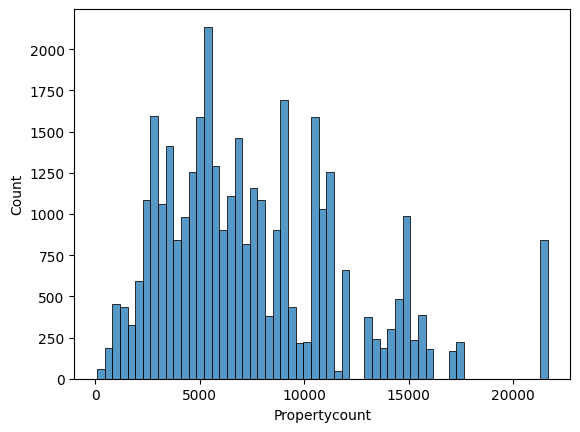

In [7]:
sns.histplot(df.Propertycount)

In [12]:
# KBinsDiscretizer class has bunch of methods for Binning and here we are doing Uniform Binning
#  In uniform binning the bins are unfirormly split which are explicitly given by user and he is also responsible for setting up the encoding , mostly  "Ordinal".
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# We specify the number of bins , stratergy and encoding
kbd = KBinsDiscretizer(strategy='uniform',n_bins=10,encode='ordinal')

In [13]:
# To check the effect we will make a new column wiht the new transformed categories of 'Propertcount'
df['PropertycountBinned'] = kbd.fit_transform(df[['Propertycount']])

<Axes: xlabel='Propertycount', ylabel='Count'>

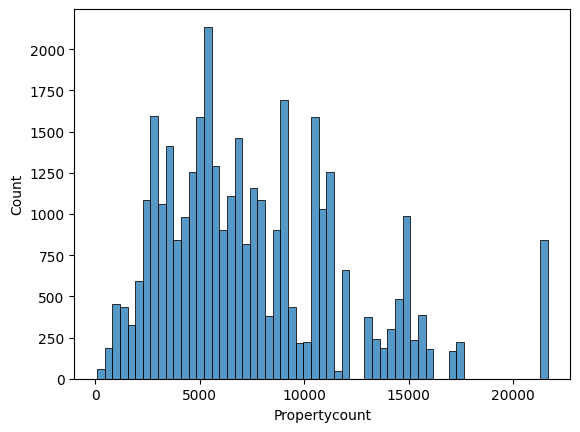

In [22]:
sns.histplot(df.Propertycount)

<Axes: xlabel='PropertycountBinned', ylabel='Count'>

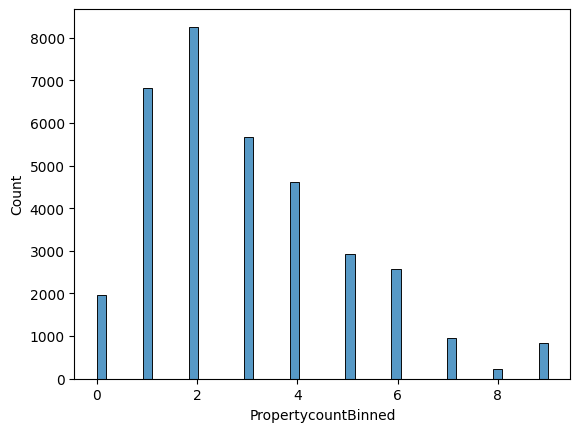

In [23]:
sns.histplot(df.PropertycountBinned)

In [32]:
# Now lets apply Equal frequency binning which works on percentile and not on equal width
kbd_equal_freq = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [33]:
df['PropertycountQuantile'] = kbd_equal_freq.fit_transform(df[['Propertycount']])

c:\Users\hp\Desktop\ML\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


[]

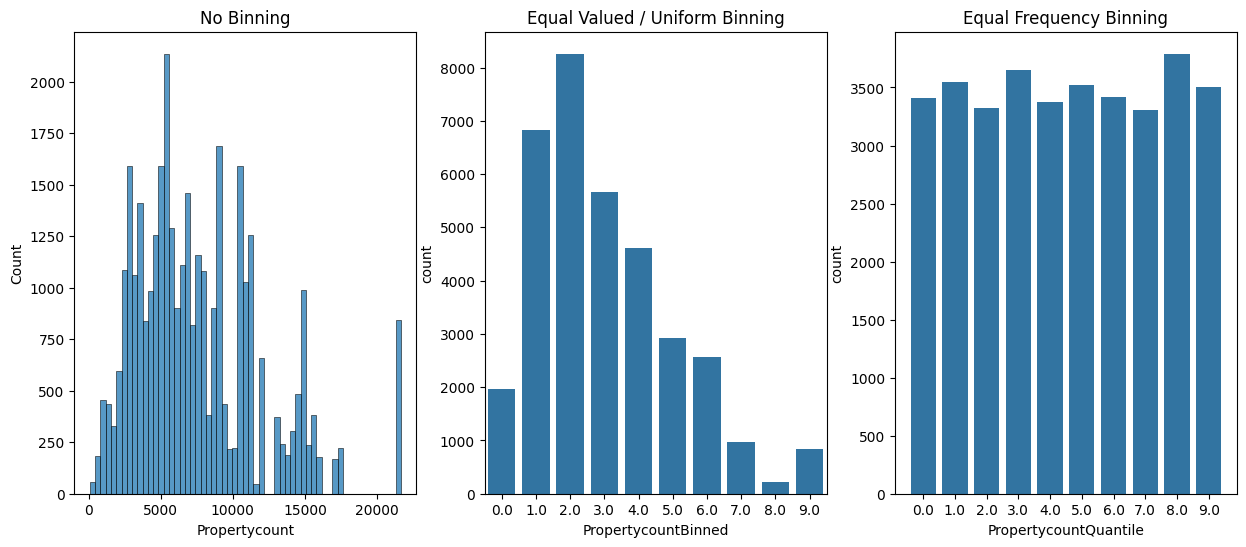

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(131)
sns.histplot(df.Propertycount)
plt.title('No Binning')
plt.subplot(132)
sns.countplot(x=df['PropertycountBinned'],data = df)
plt.title('Equal Valued / Uniform Binning')
plt.subplot(133)
sns.countplot(x=df['PropertycountQuantile'],data = df)
plt.title('Equal Frequency Binning')
plt.plot()

In [44]:
# Now lets do Kmeans strategy for Binning as this will use the KMeans ALgorithm to make bins and cluster them accordingly .
kbd_kmeans = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='kmeans')

In [45]:
df['PropertycountKMeans'] = kbd_kmeans.fit_transform(df[['Propertycount']])

<Axes: xlabel='PropertycountKMeans', ylabel='count'>

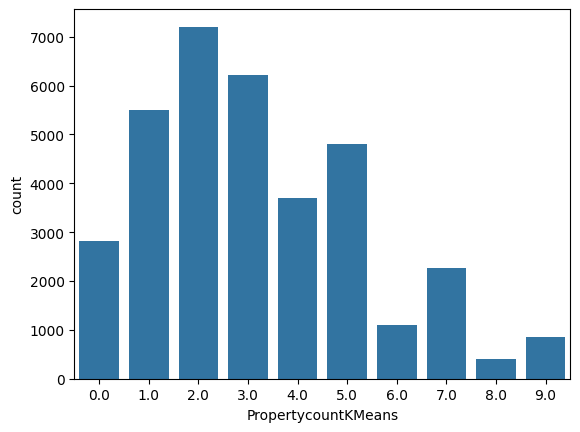

In [47]:
sns.countplot(x=df['PropertycountKMeans'],data=df)

[]

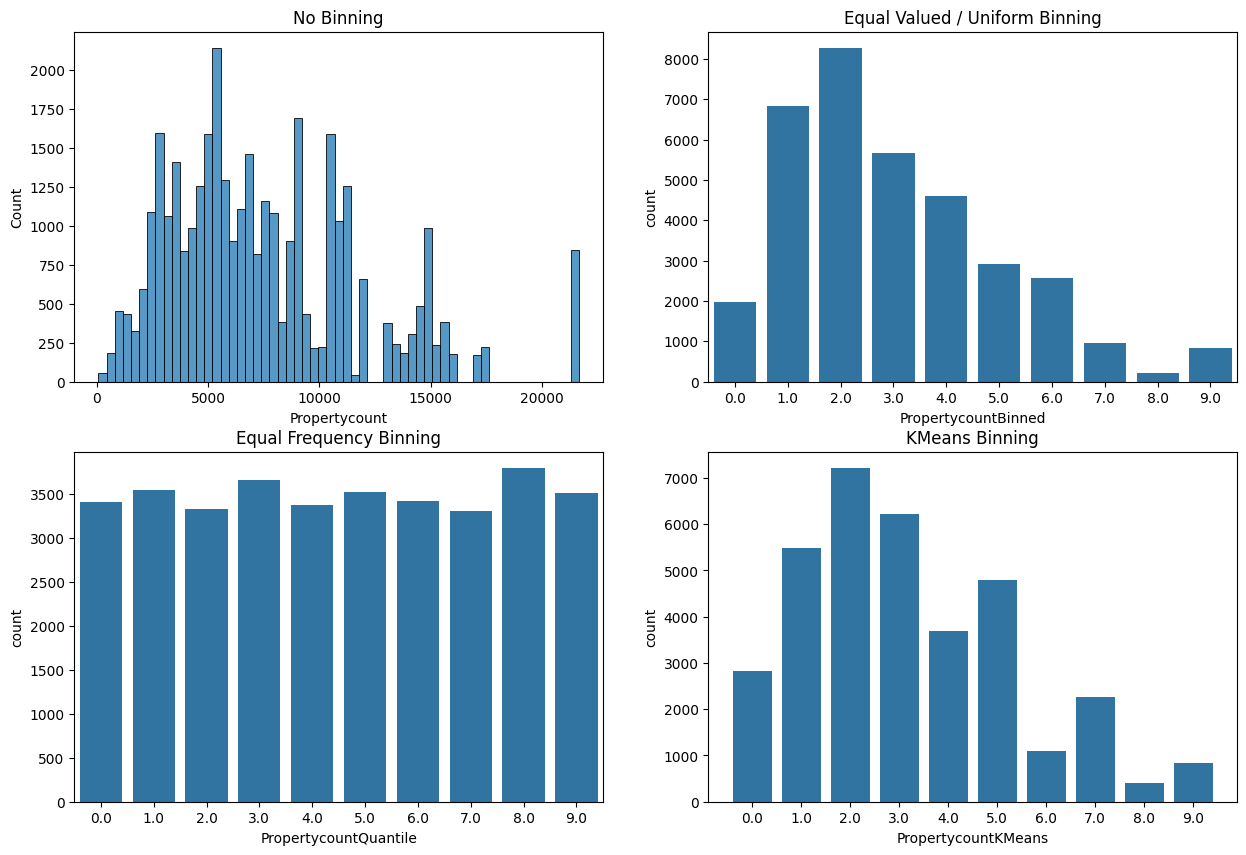

In [50]:
# Overall Evaluation of distribution :
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.histplot(df.Propertycount)
plt.title('No Binning')
plt.subplot(222)
sns.countplot(x=df['PropertycountBinned'],data = df)
plt.title('Equal Valued / Uniform Binning')
plt.subplot(223)
sns.countplot(x=df['PropertycountQuantile'],data = df)
plt.title('Equal Frequency Binning')
plt.subplot(224)
plt.title('KMeans Binning')
sns.countplot(x=df.PropertycountKMeans,data=df)
plt.plot()

In [ ]:
# Now lets look at an example of Binarization on distance column from the original dataset
# Here we are required to set a threshold value or in simple words a limit/condition ; 
# depending on the value the condition will be true or false and we are gonna set a Binary value to it accordingly .

In [ ]:
df_dist = pd.read_csv('Melbourne_housing.csv',usecols=['Distance'])

In [64]:
# Just for the testing I will be dropping the Null value rows
df_dist.dropna(inplace=True)

In [55]:
# We need the Binarizer from preprocessing for this
from sklearn.preprocessing import Binarizer

In [56]:
# Now here I am setting 5.0 as the threshold ; we can set any value depending on the current condition
binarizer = Binarizer(threshold=5.0)

In [65]:
# Now transforming 
df_dist['IsSuburban'] = binarizer.fit_transform(df_dist[['Distance']])

[]

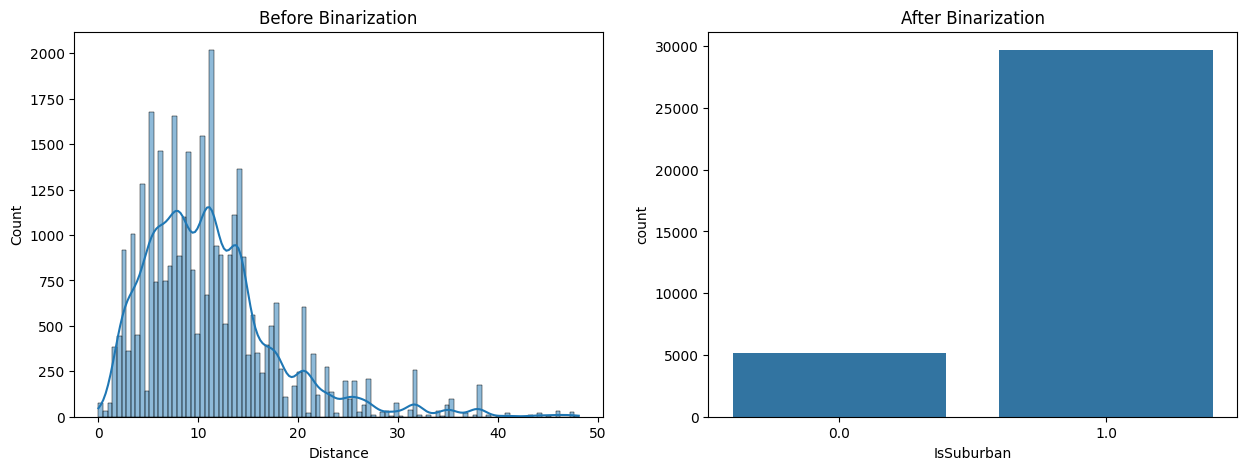

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(df_dist.Distance,kde=True)
plt.title('Before Binarization')

plt.subplot(122)
sns.countplot(x=df_dist.IsSuburban,data=df)
plt.title('After Binarization')
plt.plot()

In [74]:
# This method can be done when we have certain condition to be fulfilled to categorize into differnt bins.